In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sql_functions import read_query




In [3]:
query = 'select * from customers limit 4;'
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [4]:
query = 'show tables;'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [5]:
query = """select * from salesdata limit 3;"""
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00


In [4]:
query = """Select s.customerid, c.firstname, s.saledate, s.totalprice
from salesdata s
join customers c
on s.customerid= c.customerid
limit 5;"""

read_query(query)

,customerid,firstname,saledate,totalprice
0,C-2023-100-1,Mahika,2023-07-22,67312.00
1,C-2023-100-1,Mahika,2023-05-23,176466.00
2,C-2023-100-1,Mahika,2023-11-26,190332.00
3,C-2023-100-1,Mahika,2023-03-31,205080.00
4,C-2023-100-1,Mahika,2023-11-22,14174.00


In [6]:
query = """
Select customerid,sum(totalprice) as expenditure
from salesdata 
group by customerid 
limit 5;"""

read_query(query)

,customerid,expenditure
0,C-2023-100-1,9933032.00
1,C-2023-100-10,9779316.00
2,C-2023-100-100,9889393.00
3,C-2023-100-101,9168084.00
4,C-2023-100-102,10315608.00


In [7]:
query = """ 
select t.customerid,c.firstname,t.expenditure
from 
(select customerid,
sum(totalprice) as expenditure
from salesdata 
group by customerid) t
join customers c
on t.customerid=c.customerid;"""

read_query(query)

,customerid,firstname,expenditure
0,C-2023-100-1,Mahika,9933032.00
1,C-2023-100-10,Zeeshan,9779316.00
2,C-2023-100-100,Aaina,9889393.00
3,C-2023-100-101,Shray,9168084.00
4,C-2023-100-102,Navya,10315608.00
...,...,...,...
195,C-2023-100-95,Taran,8826287.00
196,C-2023-100-96,Bhamini,9996920.00
197,C-2023-100-97,Hunar,10432046.00
198,C-2023-100-98,Riaan,8863324.00


In [9]:
query = """ 
select t.customerid,c.firstname,t.expenditure
from 
(select customerid,
sum(totalprice) as expenditure
from salesdata 
group by customerid) t
join customers c
on t.customerid=c.customerid
order by t.expenditure desc
limit 10;"""

top_annual_customers = read_query(query)
top_annual_customers

,customerid,firstname,expenditure
0,C-2023-100-13,Veer,13016064.00
1,C-2023-100-94,Priyansh,12629337.00
2,C-2023-100-57,Riya,12599608.00
3,C-2023-100-58,Vanya,12455437.00
4,C-2023-100-88,Dhruv,12280916.00
5,C-2023-100-165,Tarini,12130487.00
6,C-2023-100-197,Yuvraj,11868602.00
7,C-2023-100-199,Rhea,11704275.00
8,C-2023-100-196,Darshit,11520699.00
9,C-2023-100-75,Prerak,11442527.00


In [20]:
top_annual_customers['expenditure'].astype(float)

0    13016064.0
1    12629337.0
2    12599608.0
3    12455437.0
4    12280916.0
5    12130487.0
6    11868602.0
7    11704275.0
8    11520699.0
9    11442527.0
Name: expenditure, dtype: float64

In [12]:
top_annual_customers['expenditure'].values

array([Decimal('13016064.00'), Decimal('12629337.00'),
       Decimal('12599608.00'), Decimal('12455437.00'),
       Decimal('12280916.00'), Decimal('12130487.00'),
       Decimal('11868602.00'), Decimal('11704275.00'),
       Decimal('11520699.00'), Decimal('11442527.00')], dtype=object)

In [24]:
top_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customerid   10 non-null     object 
 1   firstname    10 non-null     object 
 2   expenditure  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 372.0+ bytes


In [22]:
customer_names = top_annual_customers['firstname'].values

In [23]:
top_annual_customers['expenditure'] = top_annual_customers['expenditure'].astype(float)

In [25]:
customer_exp = top_annual_customers['expenditure'].values

In [35]:
cmap = plt.cm.PuBuGn(np.linspace(0.5,1,len(customer_names)))

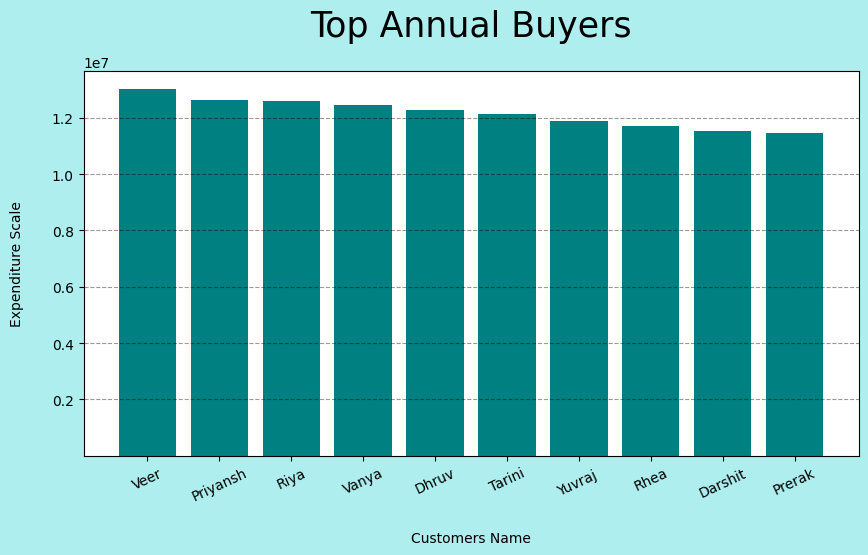

In [64]:
plt.figure(figsize=(10,5))
plt.bar(height=customer_exp,x=customer_names,bottom=20,width=0.8,color='teal')
# plt.plot(color='green')
plt.title('Top Annual Buyers',pad=25,size=25,color='black')

plt.xlabel('Customers Name',labelpad=20)
plt.ylabel('Expenditure Scale',labelpad=20)

plt.xticks(rotation=25)
plt.grid(axis='y',alpha=0.4,color='black',ls='dashed')
plt.gcf().set_facecolor('paleturquoise')
plt.savefig('Top_buyers.jpeg')


plt.show()